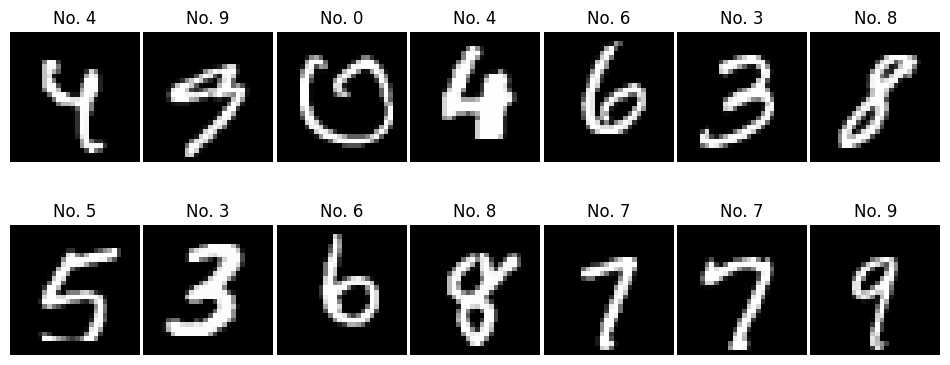

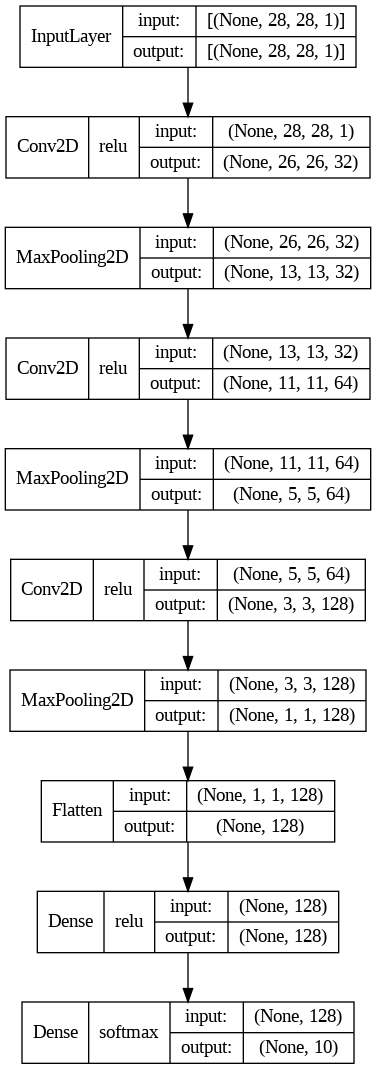

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy

#Data Loading and Preprocessing
#Data Retrieval
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#Normalization
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  # Add a channel dimension for Conv2D
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
# display 14 random images from the training set
import numpy as np
np.random.seed(123)

rand_14 = np.random.randint(0, x_train.shape[0],14)
sample_digits = x_train[rand_14]
sample_labels = y_train[rand_14]
# code to view the images
num_rows, num_cols = 2, 7
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01},
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 7 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(sample_digits[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % sample_labels[image_index])
plt.show()
plt.close()

img_height, img_width, num_channels = 28, 28, 1
num_classes = 10
#Model Architecture Design
model = Sequential([

    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, num_channels)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
  MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax'),
])
plot_model(model, show_shapes=True, show_layer_activations=True, show_layer_names=False)




In [26]:
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

#Loss Function and Optimization
model.compile(optimizer='Adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['categorical_accuracy'])

#Cross-Validation and Model Training
# Converting integer labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=10)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

all_train_loss = []
all_val_loss = []
all_train_acc = []
all_val_acc = []

for train_index, val_index in skf.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train_one_hot[train_index], y_train_one_hot[val_index]

    history = model.fit(x_train_fold, y_train_fold, epochs=1, batch_size=32, validation_data=(x_val_fold, y_val_fold))

    all_train_loss.append(history.history['loss'])
    all_val_loss.append(history.history['val_loss'])
    all_train_acc.append(history.history['categorical_accuracy'])
    all_val_acc.append(history.history['val_categorical_accuracy'])

# Flattening the lists
flat_train_loss = [item for sublist in all_train_loss for item in sublist]
flat_val_loss = [item for sublist in all_val_loss for item in sublist]
flat_train_acc = [item for sublist in all_train_acc for item in sublist]
flat_val_acc = [item for sublist in all_val_acc for item in sublist]

1500/1500 [==============================] - 52s 35ms/step - loss: 0.0363 - categorical_accuracy: 0.9883 - val_loss: 0.0304 - val_categorical_accuracy: 0.9906


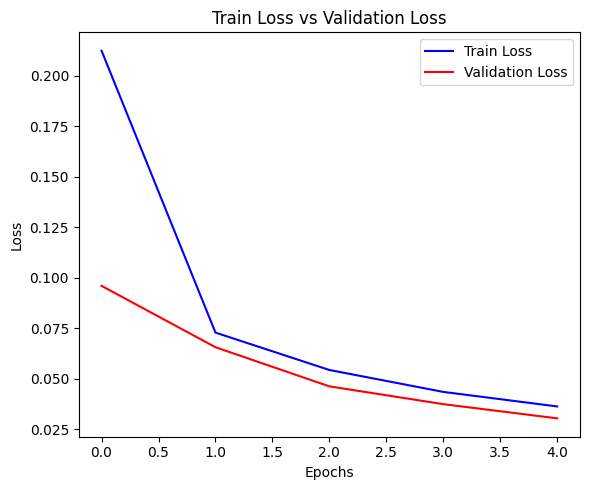

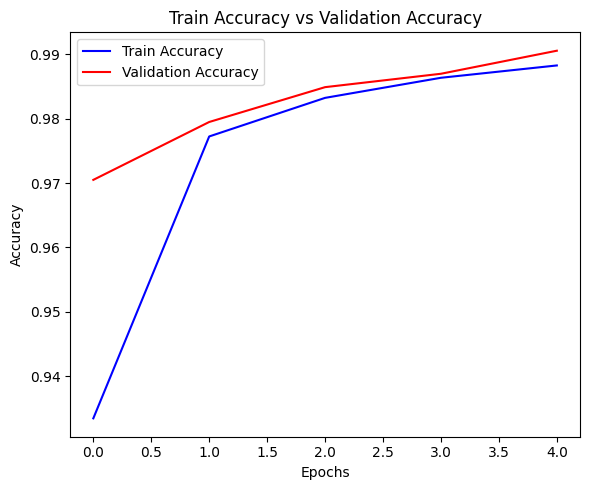

In [27]:
# Plotting Loss
plt.figure(figsize=(6, 5))
plt.plot(flat_train_loss, color='blue', label='Train Loss')
plt.plot(flat_val_loss, color='red', label='Validation Loss')
plt.legend()
plt.title('Train Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.tight_layout()
plt.show()

# Plotting Accuracy
plt.figure(figsize=(6, 5))
plt.plot(flat_train_acc, color='blue', label='Train Accuracy')
plt.plot(flat_val_acc, color='red', label='Validation Accuracy')
plt.legend()
plt.title('Train Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [3]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.utils import to_categorical

img_height, img_width, num_channels = 28, 28, 1
num_classes = 10

# Converting integer labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

#CNN model
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, num_channels)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Hyperparameters tuning
learning_rates = [0.001, 0.01, 0.1]
batch_size = 32
num_epochs = 1

best_accuracy = 0.0
best_model = None

# Cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in skf.split(x_train, y_train):
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train_one_hot[train_index], y_train_one_hot[val_index]

    for lr in learning_rates:
            model = create_model()

            #model with the current hyperparameters
            optimizer = Adam(learning_rate=lr)
            model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


            history = model.fit(x_train_fold, y_train_fold, epochs=num_epochs, batch_size=batch_size, validation_data=(x_val_fold, y_val_fold))

            # Evaluating on validation set
            val_predictions = model.predict(x_val_fold)
            val_accuracy = accuracy_score(y_val_fold.argmax(axis=1), val_predictions.argmax(axis=1))
            val_precision = precision_score(y_val_fold.argmax(axis=1), val_predictions.argmax(axis=1), average='weighted')
            val_recall = recall_score(y_val_fold.argmax(axis=1), val_predictions.argmax(axis=1), average='weighted')
            val_f1 = f1_score(y_val_fold.argmax(axis=1), val_predictions.argmax(axis=1), average='weighted')

            print(f'Learning Rate: {lr}, Batch Size: {batch_size}')
            print(f'Validation Accuracy: {val_accuracy}, Precision: {val_precision}, Recall: {val_recall}, F1 Score: {val_f1}')

            # Saving the best model based on validation accuracy
            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                best_model = model


375/375 [==============================] - 3s 8ms/step
Learning Rate: 0.001, Batch Size: 32
Validation Accuracy: 0.9686666666666667, Precision: 0.9699105868593375, Recall: 0.9686666666666667, F1 Score: 0.968800434198833
375/375 [==============================] - 4s 12ms/step
Learning Rate: 0.01, Batch Size: 32
Validation Accuracy: 0.95175, Precision: 0.9541121075530354, Recall: 0.95175, F1 Score: 0.9519330597909837
375/375 [==============================] - 3s 9ms/step
Learning Rate: 0.1, Batch Size: 32
Validation Accuracy: 0.09741666666666667, Precision: 0.009490006944444445, Recall: 0.09741666666666667, F1 Score: 0.01729517553851216


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


375/375 [==============================] - 3s 8ms/step
Learning Rate: 0.001, Batch Size: 32
Validation Accuracy: 0.969, Precision: 0.9696473133538792, Recall: 0.969, F1 Score: 0.9690543433948405
375/375 [==============================] - 4s 12ms/step
Learning Rate: 0.01, Batch Size: 32
Validation Accuracy: 0.9624166666666667, Precision: 0.9630170055512687, Recall: 0.9624166666666667, F1 Score: 0.9624940533720239
375/375 [==============================] - 3s 8ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Learning Rate: 0.1, Batch Size: 32
Validation Accuracy: 0.09866666666666667, Precision: 0.009735111111111111, Recall: 0.09866666666666667, F1 Score: 0.01772168284789644
375/375 [==============================] - 3s 9ms/step
Learning Rate: 0.001, Batch Size: 32
Validation Accuracy: 0.9765833333333334, Precision: 0.9766948390084977, Recall: 0.9765833333333334, F1 Score: 0.9765679260210536
375/375 [==============================] - 5s 12ms/step
Learning Rate: 0.01, Batch Size: 32
Validation Accuracy: 0.94625, Precision: 0.950135796259514, Recall: 0.94625, F1 Score: 0.9464184810789167
375/375 [==============================] - 3s 8ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Learning Rate: 0.1, Batch Size: 32
Validation Accuracy: 0.10216666666666667, Precision: 0.010438027777777777, Recall: 0.10216666666666667, F1 Score: 0.018940924441756136
375/375 [==============================] - 5s 13ms/step
Learning Rate: 0.001, Batch Size: 32
Validation Accuracy: 0.9649166666666666, Precision: 0.9663515673424228, Recall: 0.9649166666666666, F1 Score: 0.9649881762511631
375/375 [==============================] - 3s 8ms/step
Learning Rate: 0.01, Batch Size: 32
Validation Accuracy: 0.95875, Precision: 0.9600594015360661, Recall: 0.95875, F1 Score: 0.9588736315435379
375/375 [==============================] - 4s 9ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Learning Rate: 0.1, Batch Size: 32
Validation Accuracy: 0.0975, Precision: 0.00950625, Recall: 0.0975, F1 Score: 0.017323462414578588
375/375 [==============================] - 3s 8ms/step
Learning Rate: 0.001, Batch Size: 32
Validation Accuracy: 0.9753333333333334, Precision: 0.9755714310000307, Recall: 0.9753333333333334, F1 Score: 0.9753249994600549
375/375 [==============================] - 4s 10ms/step
Learning Rate: 0.01, Batch Size: 32
Validation Accuracy: 0.9570833333333333, Precision: 0.9571821453206543, Recall: 0.9570833333333333, F1 Score: 0.9570211272409676
375/375 [==============================] - 3s 8ms/step
Learning Rate: 0.1, Batch Size: 32
Validation Accuracy: 0.09916666666666667, Precision: 0.009834027777777778, Recall: 0.09916666666666667, F1 Score: 0.017893606267374275


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Evaluation of the best model on the test set
test_predictions = best_model.predict(x_test)
test_predictions_classes = test_predictions.argmax(axis=1)  # If needed
test_true_classes = y_test  # No need for argmax

# Calculate classification metrics
test_accuracy = accuracy_score(test_true_classes, test_predictions_classes)
test_precision = precision_score(test_true_classes, test_predictions_classes, average='weighted')
test_recall = recall_score(test_true_classes, test_predictions_classes, average='weighted')
test_f1 = f1_score(test_true_classes, test_predictions_classes, average='weighted')

print('Best Model Evaluation on Test Set:')
print(f'Test Accuracy: {test_accuracy}, Precision: {test_precision}, Recall: {test_recall}, F1 Score: {test_f1}')



313/313 [==============================] - 5s 14ms/step
Best Model Evaluation on Test Set:
Test Accuracy: 0.9798, Precision: 0.9799093148329148, Recall: 0.9798, F1 Score: 0.9797956773327394


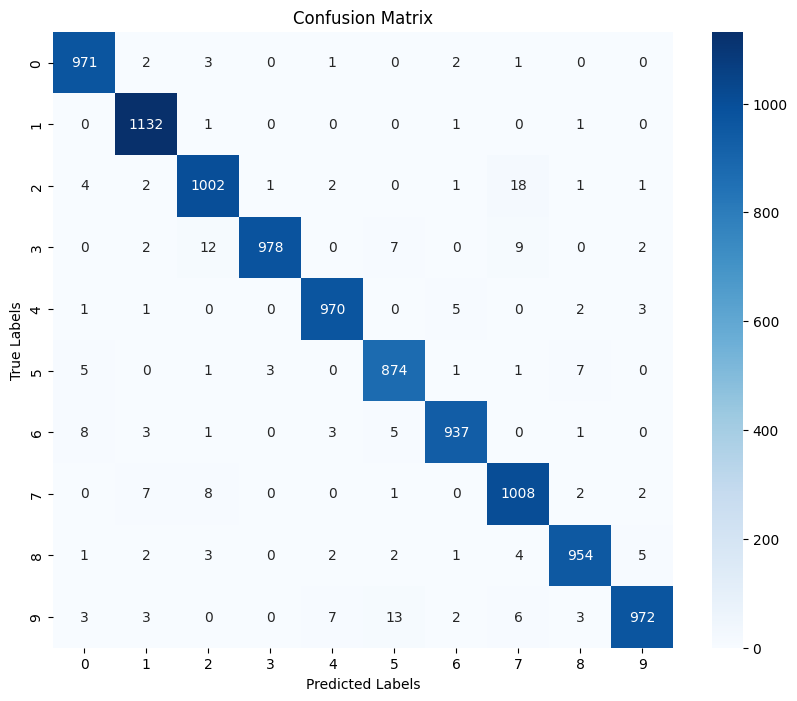

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(test_true_classes, test_predictions_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()